In [1]:
# importing libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv(r'Air India Review.csv')
df

,Rating,Customer_Name,Date,Review,Review_Body,Detail.Aircraft,Detail.Type Of Traveller,Detail.Seat Type,Detail.Route,Detail.Date Flown,...,Detail.Ground Service,Detail.Value For Money,Detail.Recommended,Detail.Wifi & Connectivity,Month,Route Start,Route End,Sentiment,Extracted_Negative_Words,Review_Length
0,1.0,Sharika Qureshi,2024-08-07,it was a horrible experience,Not Verified | I was flying from Tokyo Narita...,Boeing 787-8,Business,Economy Class,Narita to Dubai via Delhi,August 2024,...,1.0,1,no,1.0,August,Narita,Dubai,Negative,['horrible'],709
1,1.0,T Garmina,2024-08-06,bags were delayed by 2+ weeks,Trip Verified | Our bags were delayed by 2+ ...,NaN,Couple Leisure,Economy Class,Hong Kong to Vienna via Delhi,July 2024,...,2.0,2,no,1.0,August,Hong Kong,Vienna,Negative,[],352
2,1.0,N Darten,2024-08-04,No concern for consumers,Trip Verified | Pathetic service. Had taken ...,NaN,Family Leisure,Economy Class,London to Sydney via Delhi,July 2024,...,3.0,1,no,1.0,August,London,Sydney,Negative,"['pathetic', 'terrible', 'poor', 'poor']",836
3,1.0,Johanna Gomez,2024-07-30,12hour flight without a working screen,Not Verified | Will never fly with Air India...,AI 308,Solo Leisure,Economy Class,Delhi to Melbourne/Gold Coast,July 2024,...,1.0,1,no,1.0,July,Delhi,Melbourne/Gold Coast,Negative,[],727
4,2.0,C Ranaja,2024-07-29,Get your act together,Trip Verified | If Air India has such lousy i...,Boeing 787-9,Family Leisure,Economy Class,Washington to Delhi,July 2024,...,4.0,2,no,1.0,July,Washington,Delhi,Negative,[],395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,3.0,J Russell,2011-12-02,Air India customer review,LHR-DEL-BKK economy. I flew Air India for its ...,NaN,NaN,Economy Class,NaN,NaN,...,2.0,2,no,1.0,December,NaN,NaN,Neutral,"['poor', 'disappointing', 'poor']",1504
1356,7.0,A Johnston,2011-11-30,Air India customer review,YYZ-DEL-CCU in business class. Clean plane wor...,NaN,NaN,Business Class,NaN,NaN,...,2.0,4,yes,1.0,November,NaN,NaN,Positive,[],424
1357,8.0,J Samson,2011-11-04,Air India customer review,Delhi to Varanasi return. A321 superb flight. ...,NaN,NaN,Economy Class,NaN,NaN,...,2.0,5,yes,1.0,November,NaN,NaN,Positive,[],198
1358,5.0,G Narayan,2011-11-03,Air India customer review,ORD-FRA-BOM-MAA return. ORD-BOM sector on Boei...,NaN,NaN,Economy Class,NaN,NaN,...,2.0,5,no,1.0,November,NaN,NaN,Positive,['bad'],943


Average Customer Satisfaction Rating per Month:
 Month
April        4.545455
August       3.702128
December     4.035088
February     4.019802
January      3.780488
July         4.090090
June         3.654545
March        4.190141
May          3.775701
November     4.431034
October      4.473118
September    4.372549
Name: Rating, dtype: float64


<Axes: title={'center': 'Average Customer Satisfaction Rating per Month'}, xlabel='Month'>

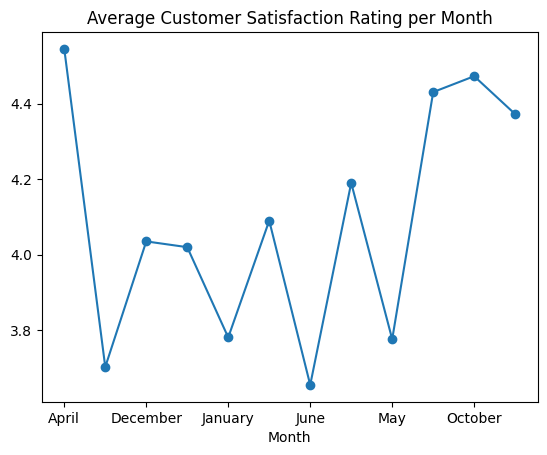

In [3]:
# Calculate the average rating per month
avg_rating_per_month = df.groupby('Month')['Rating'].mean()
print("Average Customer Satisfaction Rating per Month:\n", avg_rating_per_month)

# Visualizing the average rating per month
avg_rating_per_month.plot(kind='line', marker='o', title='Average Customer Satisfaction Rating per Month')

Rating Distribution:
 Rating
1.0     495
2.0     160
3.0      90
4.0      55
5.0      62
6.0      45
7.0      90
8.0     132
9.0     101
10.0     93
Name: count, dtype: int64


<Axes: title={'center': 'Customer Rating Distribution'}, xlabel='Rating'>

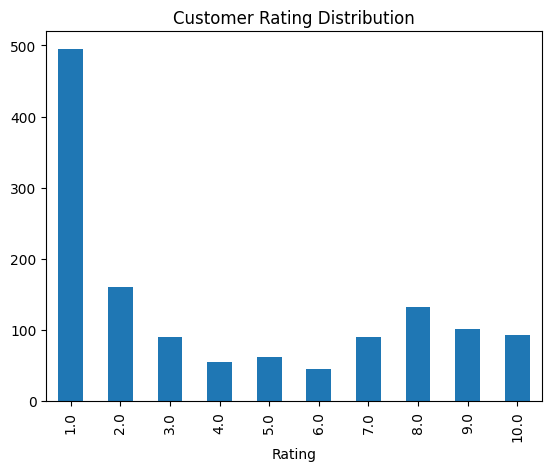

In [4]:
# customer rating distribution
rating_distribution = df['Rating'].value_counts().sort_index()
print("Rating Distribution:\n", rating_distribution)

# Visualizing the distribution
rating_distribution.plot(kind='bar', title='Customer Rating Distribution')

C:\Users\Rahul\AppData\Local\Temp\ipykernel_29320\2694950452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_traveller.index, y=avg_rating_by_traveller.values, palette='viridis')


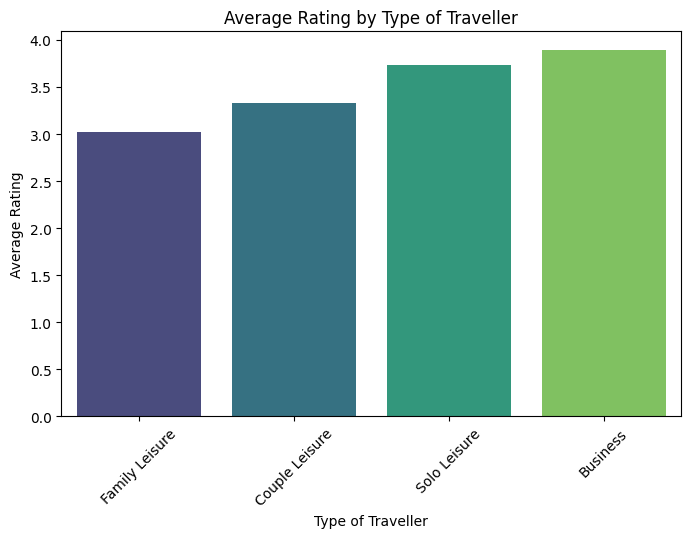

In [5]:
# Calculate average rating per type of traveler
avg_rating_by_traveller = df.groupby('Detail.Type Of Traveller')['Rating'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_traveller.index, y=avg_rating_by_traveller.values, palette='viridis')
plt.title('Average Rating by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

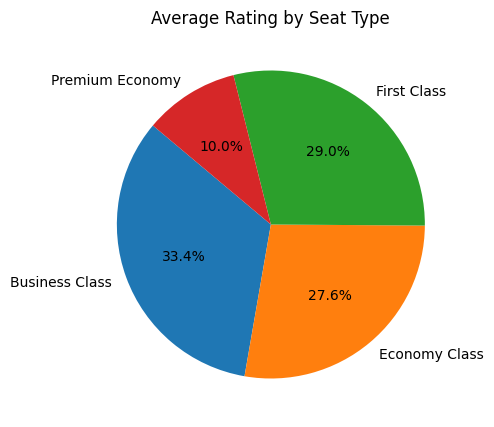

In [7]:
# Calculate average rating per seat type
avg_rating_by_seat_type = df.groupby('Detail.Seat Type')['Rating'].mean()

# Pie chart for average ratings by seat type
plt.figure(figsize=(5, 5))
plt.pie(avg_rating_by_seat_type, labels=avg_rating_by_seat_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Rating by Seat Type')
plt.show()

                                         Review_Body  Review_Length
0  Not Verified |  I was flying from Tokyo Narita...            709
1  Trip Verified |   Our bags were delayed by 2+ ...            352
2  Trip Verified |   Pathetic service. Had taken ...            836
3  Not Verified |   Will never fly with Air India...            727
4  Trip Verified |  If Air India has such lousy i...            395


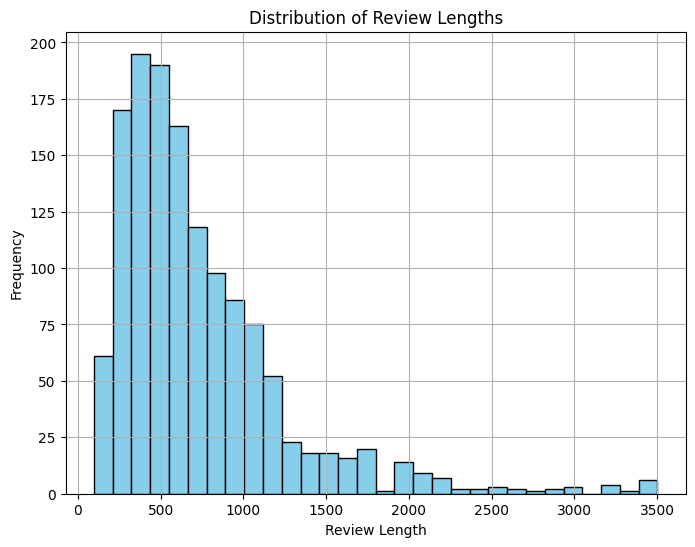

In [9]:
df['Review_Length'] = df['Review_Body'].apply(len)

# Display the DataFrame with the new column
print(df[['Review_Body', 'Review_Length']].head())

# Histogram of review lengths
plt.figure(figsize=(8, 6))
plt.hist(df['Review_Length'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
df.to_csv('Air India Review.csv',index=False)